In [13]:
library(datateachr)
library(cowplot)
library(infer)
library(knitr)
library(tidyverse)

library(palmerpenguins)

In [14]:
set.seed(2020)
soybean_caesin <- chickwts %>% 
  filter(feed == "soybean" | feed == "casein")

soybean_caesin_null_distribution <- soybean_caesin %>% 
  specify(formula = weight ~ feed) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 5000, type = "permute") %>% 
  calculate(stat = "diff in means",
            order = c("soybean", "casein"))

delta_star <- soybean_caesin %>% 
  group_by(feed) %>% 
  summarise(stat = mean(weight)) %>% 
  pull(stat) %>% 
  diff()

soybean_caesin_null_distribution %>% 
  get_pvalue(obs_stat = delta_star, direction = "both")

`summarise()` ungrouping output (override with `.groups` argument)



p_value
<dbl>
0.0044


In [15]:
gentoo <- penguins %>%
  filter(species == "Gentoo") %>%
  select(flipper_length_mm) %>%
  drop_na() %>%
  rep_sample_n(size = 124, replace = TRUE, reps = 5000) %>%
  summarise(bootstrap_sample_mean = mean(flipper_length_mm))
gentoo

`summarise()` ungrouping output (override with `.groups` argument)



replicate,bootstrap_sample_mean
<int>,<dbl>
1,217.6371
2,217.5161
3,217.6613
4,218.0161
5,217.5323
6,217.4597
7,217.0323
8,217.2581
9,217.0726


`summarise()` ungrouping output (override with `.groups` argument)



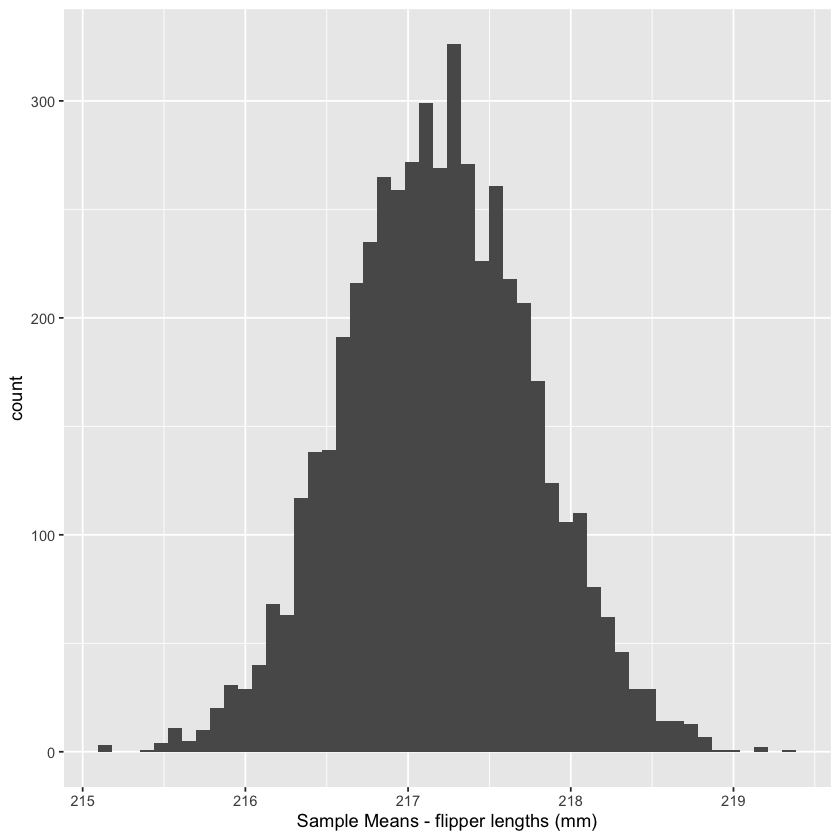

In [4]:
library(palmerpenguins)
library(tidyverse) 
library(infer)

set.seed(2020)

gentoo <- penguins %>%
  filter(species == "Gentoo") %>%
  select(flipper_length_mm) %>%
  drop_na() %>%
  rep_sample_n(size = 124, replace = TRUE, reps = 5000) %>%
  summarise(bootstrap_sample_mean = mean(flipper_length_mm))



sampling_dist_plot <- gentoo %>% 
  ggplot(aes(x = bootstrap_sample_mean)) +
  geom_histogram(bins = 50) +
  xlab("Sample Means - flipper lengths (mm)")


sampling_dist_plot

# 1. penguins

### 1. Pop

In [5]:
pop_pen <- penguins %>% 
    select(c(species,body_mass_g)) %>% 
    mutate(species = as.character(species)) %>% 
    drop_na()
# pop_pen

In [6]:
set.seed(1234) 
can_seniors <- tibble(age = (rexp(1000000, rate = 0.1)^2) + 65) %>% 
    filter(age <= 118, age >= 65)
# can_seniors

### 2. One Sample

In [7]:
one_sample_pen <- pop_pen %>% 
    rep_sample_n(size = 40) # %>% 
#     summarise(stat = sum(species == "Gentoo") / nrow(one_sample))
#     summarise(stat = mean(col_name))


# one_sample_pen

In [8]:
one_sample_age <- can_seniors %>% 
    rep_sample_n(size = 40)

one_sample_age_mean <- can_seniors %>% 
    rep_sample_n(size = 40) %>% 
    pull(age) %>% 
    mean() %>% 
    round(2)

### 3. Sampling

In [9]:
samples_n15 <- can_seniors %>% 
    rep_sample_n(size = 15, reps = 1000) %>%
    group_by(replicate) %>%
    summarise(avg = mean(age))

`summarise()` ungrouping output (override with `.groups` argument)



### 4. Bootstrap

In [10]:
bootstrap_distribution <- ungroup(one_sample_age) %>%
    specify(response = age) %>%
    generate(reps = 10000) %>%
    calculate(stat = "mean") 

# bootstrap_distribution

Setting `type = "bootstrap"` in `generate()`.



In [11]:
one_sample <- tibble(type = c("candy corn",
               "rockets",
               "candy corn",
               "candy corn",
               "rockets",
               "rockets"))

In [12]:
boot_dist <- one_sample %>% 
    rep_sample_n(size = nrow(one_sample), replace = TRUE, reps = 2000) %>% 
    summarise(stat = sum(type == "candy corn") / nrow(one_sample))

# boot_dist

`summarise()` ungrouping output (override with `.groups` argument)

